#Non-Linearity of Data

Import Libraries and Set Styles

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Use a valid plot style
plt.style.use('ggplot')  # Change this to any available style in your environment
sns.set_palette('viridis')  # Set a color palette for consistency


Load the Dataset

In [4]:
import gdown
import pandas as pd

# Step 1: Use the shared link to download the file
file_url = 'https://drive.google.com/uc?id=1wUw1J6Xar7439pe1hRMmkpOQCJ16fvha'
output_path = 'DailyDelhiClimate.csv'

# Download the file using gdown
gdown.download(file_url, output_path, quiet=False)

# Step 2: Load the dataset into a DataFrame
df = pd.read_csv(output_path)

# Step 3: Display the first few rows to verify
df.head()



Downloading...
From: https://drive.google.com/uc?id=1wUw1J6Xar7439pe1hRMmkpOQCJ16fvha
To: /content/DailyDelhiClimate.csv
100%|██████████| 85.3k/85.3k [00:00<00:00, 57.1MB/s]


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Convert the Date Column and Inspect Data

In [5]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check the data types and basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1576 non-null   datetime64[ns]
 1   meantemp      1576 non-null   float64       
 2   humidity      1576 non-null   float64       
 3   wind_speed    1576 non-null   float64       
 4   meanpressure  1576 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 61.7 KB


Select Features and Target Variable

In [6]:
# Select features and target variable
features = ['humidity', 'wind_speed', 'meanpressure']
X = df[features].values
y = df['meantemp'].values

# Display basic statistics for selected features and target
df[features + ['meantemp']].describe()


,humidity,wind_speed,meanpressure,meantemp
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,60.445229,6.899262,1010.593178,25.221918
std,16.979994,4.510725,175.242704,7.345014
min,13.428571,0.000000,-3.041667,6.000000
25%,49.750000,3.700000,1001.875000,18.500000
50%,62.440476,6.363571,1009.055556,27.166667
75%,72.125000,9.262500,1015.200000,31.142857
max,100.000000,42.220000,7679.333333,38.714286


Standardize the Data

In [7]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print a snippet of the standardized data to verify
pd.DataFrame(X_scaled, columns=features).head()


,humidity,wind_speed,meanpressure
0,1.417103,-1.530010,0.028960
1,1.858940,-0.869152,0.041138
2,1.564382,-0.502502,0.046085
3,0.641435,-1.256500,0.037523
4,1.554564,-0.709482,0.033717


Create a Scatter Matrix

<Figure size 1200x1200 with 0 Axes>

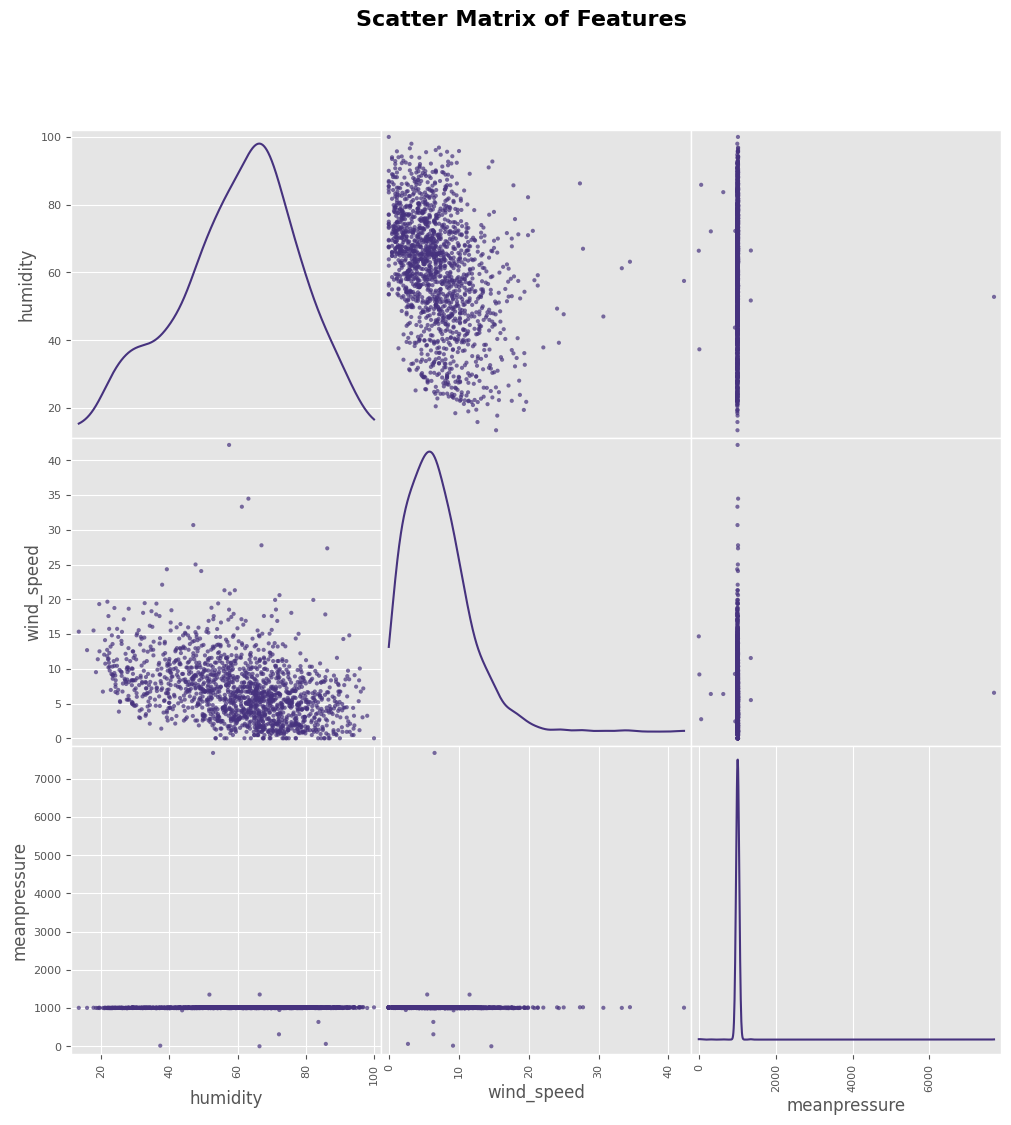

In [8]:
# Create a scatter matrix to visualize feature relationships
plt.figure(figsize=(12, 12))
scatter_matrix_df = pd.DataFrame(X, columns=features)
scatter_matrix(scatter_matrix_df, alpha=0.7, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Features', fontsize=16, fontweight='bold')
plt.show()


Apply PCA for Dimensionality Reduction

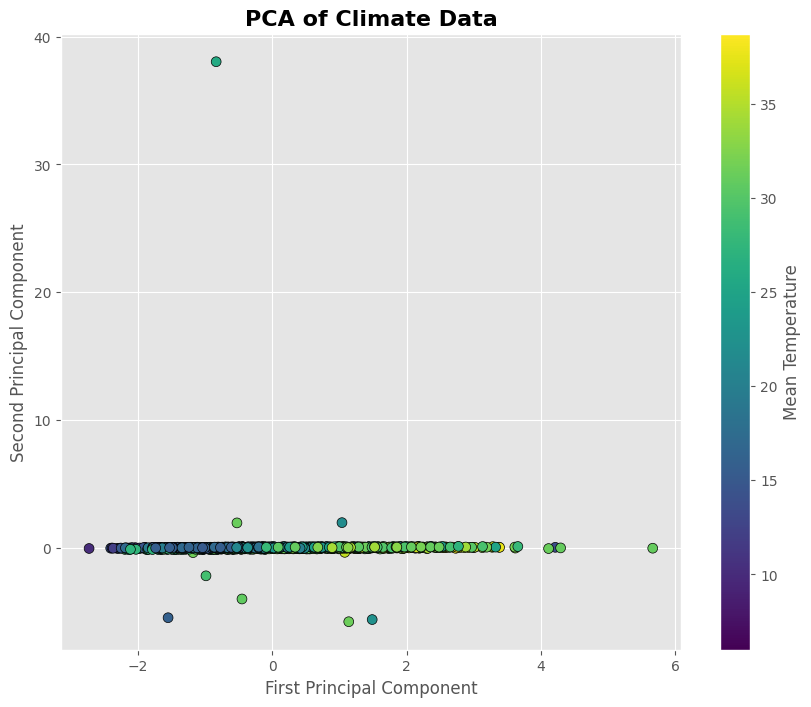

In [9]:
# Apply PCA to visualize the data in lower dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Climate Data', fontsize=16, fontweight='bold')
plt.colorbar(label='Mean Temperature')
plt.show()


Train a Linear Regression Model and Plot Residuals

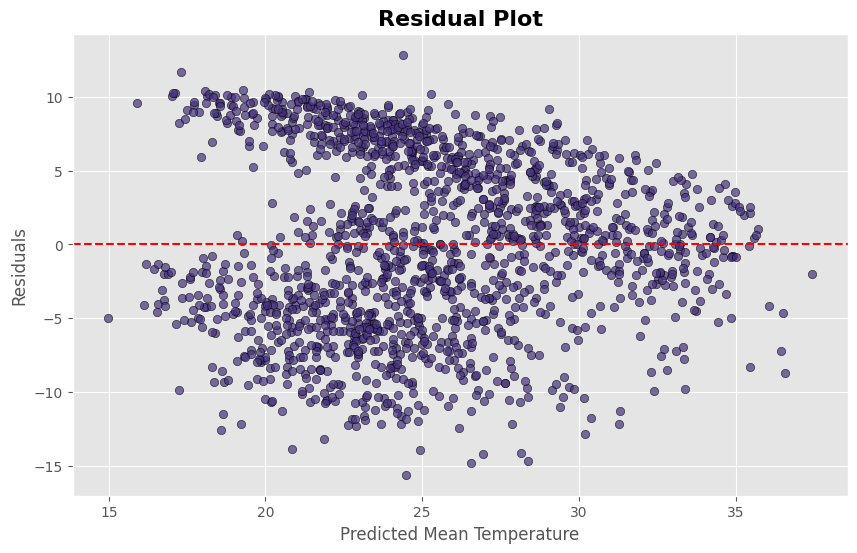

In [10]:
# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)
y_pred = lin_reg.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Mean Temperature')
plt.ylabel('Residuals')
plt.title('Residual Plot', fontsize=16, fontweight='bold')
plt.show()


Plot the Correlation Matrix

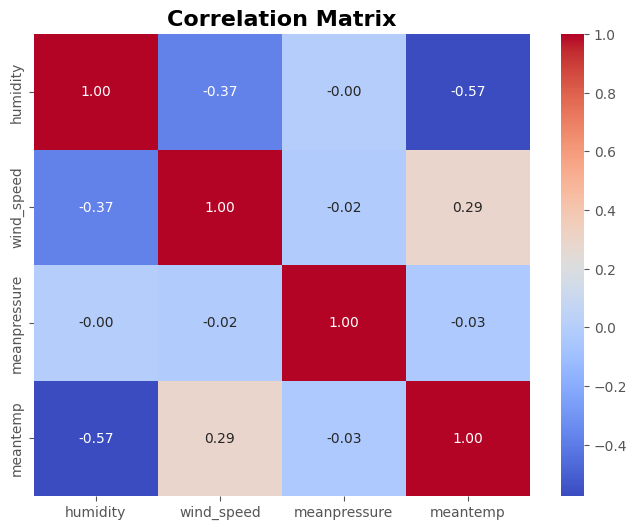

In [11]:
# Calculate and plot the correlation matrix
correlation_matrix = df[features + ['meantemp']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()



#Climate Modelling

#Load and Preprocess the Data

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Download the file from the Google Drive link
file_url = 'https://drive.google.com/uc?id=1wUw1J6Xar7439pe1hRMmkpOQCJ16fvha'
file_path = 'DailyDelhiClimate.csv'
gdown.download(file_url, file_path, quiet=False)

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows to verify loading
print(df.head())

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Select features and target variable
features = ['humidity', 'wind_speed', 'meanpressure']
target = 'meantemp'
X = df[features].values
y = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Downloading...
From: https://drive.google.com/uc?id=1wUw1J6Xar7439pe1hRMmkpOQCJ16fvha
To: /content/DailyDelhiClimate.csv
100%|██████████| 85.3k/85.3k [00:00<00:00, 54.0MB/s]

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


#Apply Kernel PCA with Different Kernels

Linear Kernel

In [13]:
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA with linear kernel
kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_train_kpca_linear = kpca_linear.fit_transform(X_train)
X_test_kpca_linear = kpca_linear.transform(X_test)


Polynomial Kernel

In [14]:
# Apply Kernel PCA with polynomial kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3)
X_train_kpca_poly = kpca_poly.fit_transform(X_train)
X_test_kpca_poly = kpca_poly.transform(X_test)


RBF Kernel

In [15]:
# Apply Kernel PCA with RBF kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
X_test_kpca_rbf = kpca_rbf.transform(X_test)


Sigmoid Kernel

In [16]:
# Apply Kernel PCA with sigmoid kernel
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.01)
X_train_kpca_sigmoid = kpca_sigmoid.fit_transform(X_train)
X_test_kpca_sigmoid = kpca_sigmoid.transform(X_test)


#Train and Evaluate SVM Models with Different Kernels

Linear Kernel

In [17]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train an SVR model with linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_kpca_linear, y_train)

# Make predictions
y_pred_linear = svr_linear.predict(X_test_kpca_linear)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print(f'Kernel: linear')
print(f'Mean Squared Error: {mse_linear}')
print(f'Mean Absolute Error: {mae_linear}')
print(f'R-squared: {r2_linear}')



Kernel: linear
Mean Squared Error: 41.47118738575849
Mean Absolute Error: 5.2319455693515335
R-squared: 0.2524850044366056


Polynomial Kernel

In [18]:
# Train an SVR model with polynomial kernel
svr_poly = SVR(kernel='poly', degree=3)
svr_poly.fit(X_train_kpca_poly, y_train)

# Make predictions
y_pred_poly = svr_poly.predict(X_test_kpca_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Kernel: poly')
print(f'Mean Squared Error: {mse_poly}')
print(f'Mean Absolute Error: {mae_poly}')
print(f'R-squared: {r2_poly}')



Kernel: poly
Mean Squared Error: 59.516897352174254
Mean Absolute Error: 6.457977105079002
R-squared: -0.07278754394757558


RBF Kernel

In [19]:
# Train an SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_rbf.fit(X_train_kpca_rbf, y_train)

# Make predictions
y_pred_rbf = svr_rbf.predict(X_test_kpca_rbf)

# Evaluate the model
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print(f'Kernel: rbf')
print(f'Mean Squared Error: {mse_rbf}')
print(f'Mean Absolute Error: {mae_rbf}')
print(f'R-squared: {r2_rbf}')

Kernel: rbf
Mean Squared Error: 36.34613415469598
Mean Absolute Error: 5.107653143865937
R-squared: 0.3448636987730853


In [20]:
# Train an SVR model with sigmoid kernel
svr_sigmoid = SVR(kernel='sigmoid', gamma=0.01)
svr_sigmoid.fit(X_train_kpca_sigmoid, y_train)

# Make predictions
y_pred_sigmoid = svr_sigmoid.predict(X_test_kpca_sigmoid)

# Evaluate the model
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

print(f'Kernel: sigmoid')
print(f'Mean Squared Error: {mse_sigmoid}')
print(f'Mean Absolute Error: {mae_sigmoid}')
print(f'R-squared: {r2_sigmoid}')



Kernel: sigmoid
Mean Squared Error: 59.286635189484194
Mean Absolute Error: 6.44498661198563
R-squared: -0.06863708599418739


#Summary of Results

In [21]:
results = {
    'linear': {'MSE': mse_linear, 'MAE': mae_linear, 'R2': r2_linear},
    'poly': {'MSE': mse_poly, 'MAE': mae_poly, 'R2': r2_poly},
    'rbf': {'MSE': mse_rbf, 'MAE': mae_rbf, 'R2': r2_rbf},
    'sigmoid': {'MSE': mse_sigmoid, 'MAE': mae_sigmoid, 'R2': r2_sigmoid}
}

# Print the results
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}, Mean Squared Error: {metrics['MSE']}, Mean Absolute Error: {metrics['MAE']}, R-squared: {metrics['R2']}")

Kernel: linear, Mean Squared Error: 41.47118738575849, Mean Absolute Error: 5.2319455693515335, R-squared: 0.2524850044366056
Kernel: poly, Mean Squared Error: 59.516897352174254, Mean Absolute Error: 6.457977105079002, R-squared: -0.07278754394757558
Kernel: rbf, Mean Squared Error: 36.34613415469598, Mean Absolute Error: 5.107653143865937, R-squared: 0.3448636987730853
Kernel: sigmoid, Mean Squared Error: 59.286635189484194, Mean Absolute Error: 6.44498661198563, R-squared: -0.06863708599418739
